In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [3]:
# Mouse data and study results

mouse_metadata_df = pd.read_csv("Resources/Mouse_metadata.csv")
study_results_df = pd.read_csv("Resources/Study_results.csv")

In [4]:
mouse_metadata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
# Find any rows with identical Mouse ID and Timepoint values

duplicate_mice = study_results_df[study_results_df.duplicated(["Mouse ID", "Timepoint"], keep = False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [7]:
# All data associated with mouse g989

study_results_df.loc[study_results_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [8]:
# Remove all data associated with mouse g989

study_results_cleaned_df = study_results_df.drop(study_results_df.loc[study_results_df["Mouse ID"] == "g989"].index)
study_results_cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [9]:
# Count the number of mice in the cleaned DataFrame

mice_total = len(study_results_cleaned_df["Mouse ID"].unique())
mice_total

248

In [10]:
# Combine Mouse_metadata and Study_results into one DataFrame

combined_df = pd.merge(study_results_cleaned_df, mouse_metadata_df, on = "Mouse ID")
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary Statistics

In [11]:
# Tumor sizes based on drug regimen

tumor_stats = combined_df[["Drug Regimen", "Tumor Volume (mm3)"]].copy().groupby("Drug Regimen")["Tumor Volume (mm3)"]

In [12]:
mean_vol = tumor_stats.mean()
median_vol = tumor_stats.median()
stdev_vol = tumor_stats.std()


In [13]:
summary_table = pd.DataFrame({
    "Mean Volume (mm3)": mean_vol,
    "Median (mm3)": median_vol,
    "Standard Deviation (mm3)": stdev_vol,

})

summary_table

,Mean Volume (mm3),Median (mm3),Standard Deviation (mm3)
Drug Regimen,,,
Capomulin,40.675741,41.557809,4.994774
Ceftamin,52.591172,51.776157,6.268188
Infubinol,52.884795,51.820584,6.567243
Ketapril,55.235638,53.698743,8.279709
Naftisol,54.331565,52.509285,8.134708
Placebo,54.033581,52.288934,7.821003
Propriva,52.320930,50.446266,6.622085
Ramicane,40.216745,40.673236,4.846308
Stelasyn,54.233149,52.431737,7.710419


## Bar Charts

In [14]:
drug_names = summary_table.index
mice_per_drug = combined_df.groupby("Drug Regimen")["Mouse ID"].value_counts().unique()

drug_counts_df = pd.DataFrame({
    "Drug Regimen": drug_names,
    "Mice": mice_per_drug
}).set_index(["Drug Regimen"])

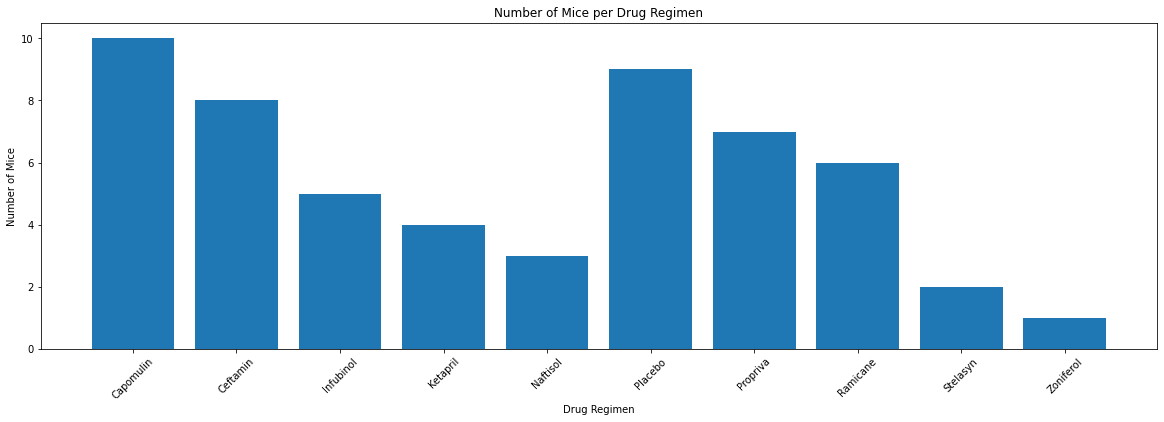

In [15]:
# Total mice for each treatment using pyplot
plt.figure(figsize = (20,6))
plt.bar(drug_names, mice_per_drug)
plt.xticks(rotation = 45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")

plt.show()

<AxesSubplot:title={'center':'Number of Mice per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

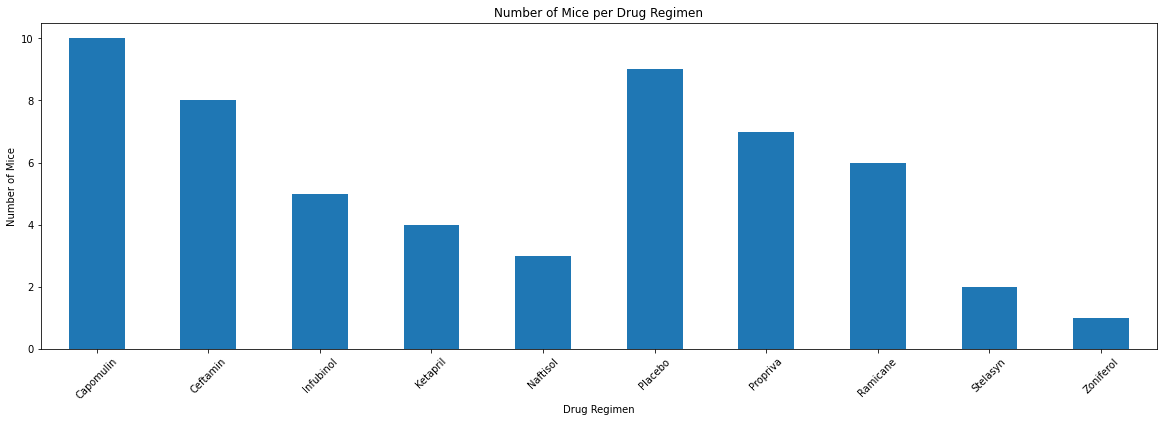

In [16]:
# Total mice for each treatment using DataFrame.plot()

drug_counts_df.plot(kind = 'bar',
                    figsize = (20,6),
                    title = "Number of Mice per Drug Regimen",
                    legend = False,
                    xlabel = "Drug Regimen", rot = 45,
                    ylabel = "Number of Mice")

## Pie Charts

In [29]:
gender_distribution = combined_df["Sex"].value_counts()
gender_distribution

Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:title={'center':'Gender Distribution'}>

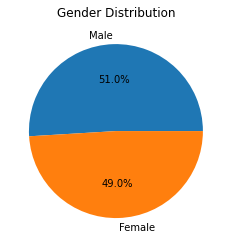

In [42]:
# Gender distribution using pandas

gender_distribution.plot(kind = "pie",
                        ylabel = "",
                        title = "Gender Distribution",
                        autopct = "%1.1f%%"
                        )

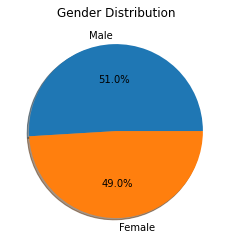

In [39]:
# Gender distribution using pyplot

plt.pie(gender_distribution,
        labels = gender_distribution.index,
        autopct = "%1.1f%%",
        shadow=True
       )
plt.title("Gender Distribution")

plt.show()